In [3]:
# ## Lab Exercise 2a - Moving Average Filters
# =============================================================================
# 2024-08-27 Reto Wildhaber   
# Edited by Sebastian Fernandez
# -----------------------------------------------------------------------------

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import lfilter

Filename: SECG3_FILT_HP51_3CH_20S_FS2400HZ.csv
Number of loaded samples:  7200
Total signal duration [s]:  3.0
Signal shape and samples (7200,) : [-0.05681213 -0.06894511 -0.06585104 ... -0.06406844 -0.06553252
 -0.06495864]


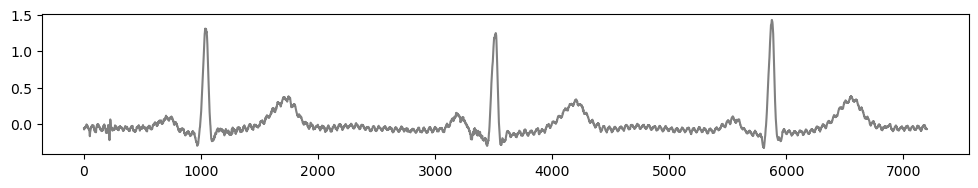

In [4]:
# --------------- loading test signal -----------------------
# Choose between real and synthetic test signal by setting one of them to "True".
if True: # Real ECG Signal
    file_name = 'SECG3_FILT_HP51_3CH_20S_FS2400HZ.csv'
    fs = 2400  # sampling rate [Hz] of recorded signal
    K = fs*3  # number of samples to process. Here: fs*<number of seconds>
    x = np.genfromtxt(file_name, usecols=(1), delimiter=r',', skip_header=0, )[:K]
    
if False: # Syntetic Test signal
    file_name = '(Synthetic Rectangle at 2Hz)'
    fs = 1000  # sampling rate [Hz] of recorded signal
    f = 2 # [Hz] Frequency of rectangular singnal
    K = fs*3  # number of samples to process. Here: fs*<number of seconds>
    x = np.arange(K)%(fs//f) < (0.5*fs//f) # generate rectangular test signal
    
k = np.arange(K) # create time index vector
        
# plot signal
fig, axs = plt.subplots(1, 1, sharex='all', figsize=(10, 2))
fig.tight_layout()
axs.plot(k, x, color='gray')

print("Filename:", file_name)
print("Number of loaded samples: ",K)
print("Total signal duration [s]: ", K/fs)
print("Signal shape and samples "+str(x.shape)+" : "+str(x))

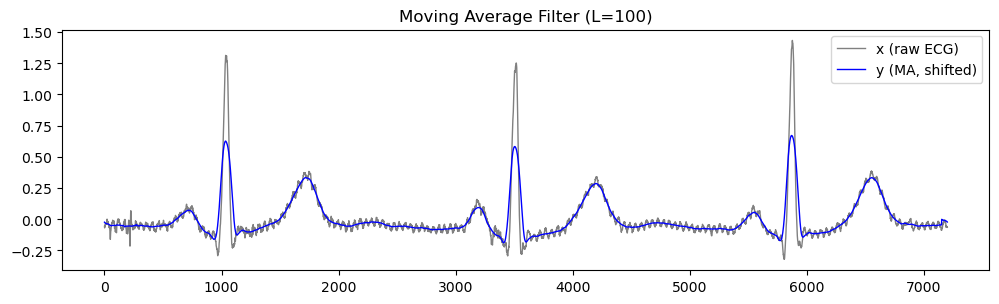

In [23]:
L = 100  # Length of Moving Average filter
h = np.ones(L) / L  # Moving average filter impulse response
y = lfilter(h, 1, x)  # Apply the moving average filter

# Shift the filtered signal to align it with the raw signal
delay = (L - 1) // 2
y_ = np.roll(y, -delay)  # Compensate for the filter delay


# Cell (3) - Plotting filter results
fig, axs = plt.subplots(1, 1, sharex='all', figsize=(10, 3))
fig.tight_layout()
axs.plot(k, x, lw=1.0, color='gray', label="x (raw ECG)")
#axs.plot(k, y, lw=1.0, ls='--', color='blue', label="y (MA)")
axs.plot(k, y_, lw=1.0, ls='-', color='blue', label="y (MA, shifted)")
axs.set_title("Moving Average Filter (L=" + str(L) + ")")

axs.legend()
plt.show()

In [24]:

def calculate_snr(signal_true, signal_filtered):
    signal_power = np.mean(signal_true**2)
    noise_power = np.mean((signal_true - signal_filtered)**2)
    return 10 * np.log10(signal_power / noise_power)

# Test different L values
snr_values = []
for L in range(5, 150):  # Test L from 5 to 50
    h = np.ones(L) / L
    y = lfilter(h, 1, x)  # Apply moving average filter
    y_ = np.roll(y, -((L - 1) // 2))  # Compensate for delay
    snr = calculate_snr(x, y_)
    snr_values.append((L, snr))

best_L, best_snr = max(snr_values, key=lambda t: t[1])
print(f"Best L: {best_L}, Best SNR: {best_snr:.2f} dB")

Best L: 5, Best SNR: 32.67 dB
